# Generating Results on Datasets

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import sys
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14, 8]

sys.path.append('../..')
from pytracking.analysis.plot_results import plot_results, print_results, print_per_sequence_results
from pytracking.evaluation import Tracker, get_dataset, trackerlist

## Plots for OTB, NFS and UAV

In [ ]:
trackers = []
trackers.extend(trackerlist('atom', 'default', range(0,5), 'ATOM'))
trackers.extend(trackerlist('dimp', 'dimp18', range(0,5), 'DiMP18'))
trackers.extend(trackerlist('dimp', 'dimp50', range(0,5), 'DiMP50'))
trackers.extend(trackerlist('dimp', 'prdimp18', range(0,5), 'PrDiMP18'))
trackers.extend(trackerlist('dimp', 'prdimp50', range(0,5), 'PrDiMP50'))

dataset = get_dataset('otb')
plot_results(trackers, dataset, 'OTB', merge_results=True, plot_types=('success', 'prec'), 
             skip_missing_seq=False, force_evaluation=True, plot_bin_gap=0.05, exclude_invalid_frames=False)

dataset = get_dataset('nfs')
plot_results(trackers, dataset, 'NFS', merge_results=True, plot_types=('success', 'prec'), 
             skip_missing_seq=False, force_evaluation=True, plot_bin_gap=0.05, exclude_invalid_frames=False)
               trackerlist('mh_dimp_summary', 'super_dimp_on_x_gamma1_01_l2', range(5)) + \
               trackerlist('mh_dimp_summary', 'super_dimp_global_x_gamma1_01_cd', range(5)) + \
dataset = get_dataset('uav')
plot_results(trackers, dataset, 'UAV', merge_results=True, plot_types=('success', 'prec'), 
             skip_missing_seq=False, force_evaluation=True, plot_bin_gap=0.05, exclude_invalid_frames=False)

dataset = get_dataset('otb', 'nfs', 'uav')
plot_results(trackers, dataset, 'OTB+NFS+UAV', merge_results=True, plot_types=('success', 'prec'), 
             skip_missing_seq=False, force_evaluation=True, plot_bin_gap=0.05, exclude_invalid_frames=False)

## Plots for LaSOT

In [ ]:
trackers = []
trackers.extend(trackerlist('atom', 'default', range(0,5), 'ATOM'))
trackers.extend(trackerlist('dimp', 'dimp18', range(0,5), 'DiMP18'))
trackers.extend(trackerlist('dimp', 'dimp50', range(0,5), 'DiMP50'))
trackers.extend(trackerlist('dimp', 'prdimp18', range(0,5), 'PrDiMP18'))
trackers.extend(trackerlist('dimp', 'prdimp50', range(0,5), 'PrDiMP50'))

dataset = get_dataset('lasot')
plot_results(trackers, dataset, 'LaSOT', merge_results=True, plot_types=('success'), 
             skip_missing_seq=False, force_evaluation=True, plot_bin_gap=0.05)

100%|██████████| 21/21 [00:04<00:00,  4.77it/s]




Computed results over 21 / 21 sequences

Plotting results over 21 / 21 sequences

Generating plots for: Fish


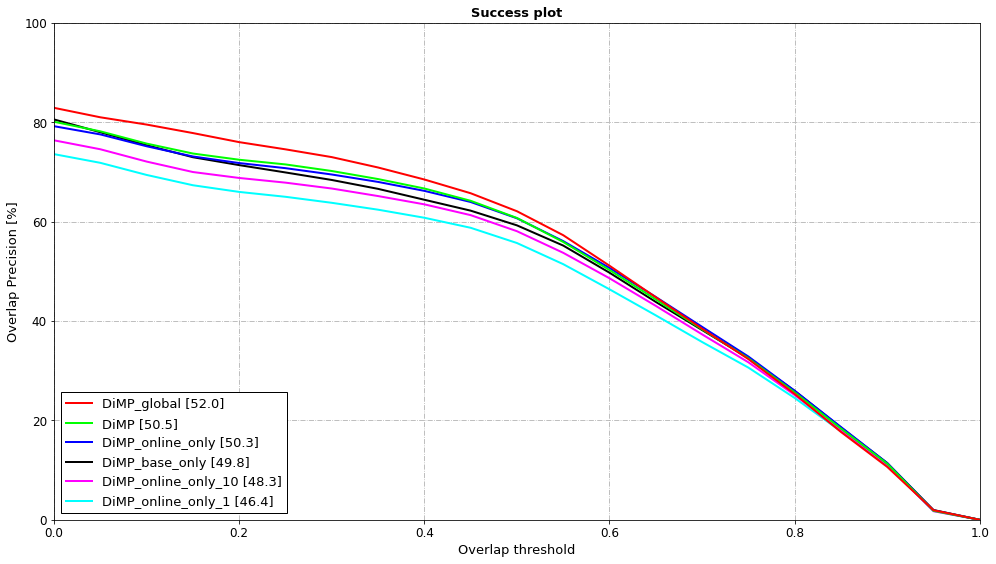

In [3]:
trackers = []
#trackers.extend(trackerlist('mh_dimp_summary', 'super_dimp_15', range(0,1), 'MH'))
trackers.extend(trackerlist('dimp_original', 'super_dimp',range(0,5), 'DiMP'))
trackers.extend(trackerlist('dimp_original', 'super_dimp_baseline_only', range(0,5), 'DiMP_base_only'))
trackers.extend(trackerlist('dimp_original', 'super_dimp_online_only', range(0,5), 'DiMP_online_only'))
trackers.extend(trackerlist('dimp_original', 'super_dimp_online_only_10', range(0,5), 'DiMP_online_only_10'))
trackers.extend(trackerlist('dimp_original', 'super_dimp_online_only_1', range(0,5), 'DiMP_online_only_1'))
trackers.extend(trackerlist('mh_dimp_summary', 'super_dimp_global', range(0,5), 'DiMP_global'))
dataset = get_dataset('fish')
plot_results(trackers, dataset, 'Fish', merge_results=True, plot_types=('success'), 
             skip_missing_seq=False, force_evaluation=True, plot_bin_gap=0.05)

100%|██████████| 21/21 [00:06<00:00,  3.40it/s]




Computed results over 21 / 21 sequences

Plotting results over 21 / 21 sequences

Generating plots for: Fish


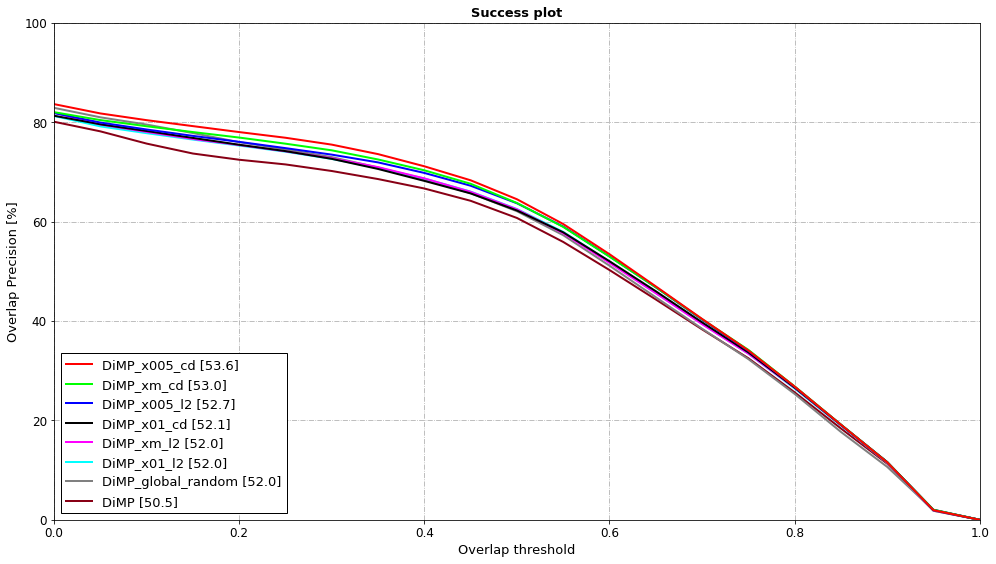

In [5]:
trackers = []
#trackers.extend(trackerlist('mh_dimp_summary', 'super_dimp_15', range(0,1), 'MH'))
trackers.extend(trackerlist('dimp_original', 'super_dimp', range(0,5), 'DiMP'))
trackers.extend(trackerlist('mh_dimp_summary', 'super_dimp_global_x_mean_cd',range(0,5), 'DiMP_xm_cd'))
trackers.extend(trackerlist('mh_dimp_summary', 'super_dimp_global_x_mean_l2', range(0,5), 'DiMP_xm_l2'))
trackers.extend(trackerlist('mh_dimp_summary', 'super_dimp_global_x_gamma1_005_cd', range(0,5), 'DiMP_x005_cd'))
trackers.extend(trackerlist('mh_dimp_summary', 'super_dimp_global_x_gamma1_005_l2', range(0,5), 'DiMP_x005_l2'))
trackers.extend(trackerlist('mh_dimp_summary', 'super_dimp_global_x_gamma1_01_cd', range(0,5), 'DiMP_x01_cd'))
trackers.extend(trackerlist('mh_dimp_summary', 'super_dimp_global_x_gamma1_01_l2', range(0,5), 'DiMP_x01_l2'))
trackers.extend(trackerlist('mh_dimp_summary', 'super_dimp_global', range(0,5), 'DiMP_global_random'))

dataset = get_dataset('fish')
plot_results(trackers, dataset, 'Fish', merge_results=True, plot_types=('success'), 
             skip_missing_seq=False, force_evaluation=True, plot_bin_gap=0.05)

100%|█████████████████████████████████████████| 280/280 [00:48<00:00,  5.76it/s]




Computed results over 149 / 280 sequences

Plotting results over 149 / 280 sequences

Generating plots for: OTB


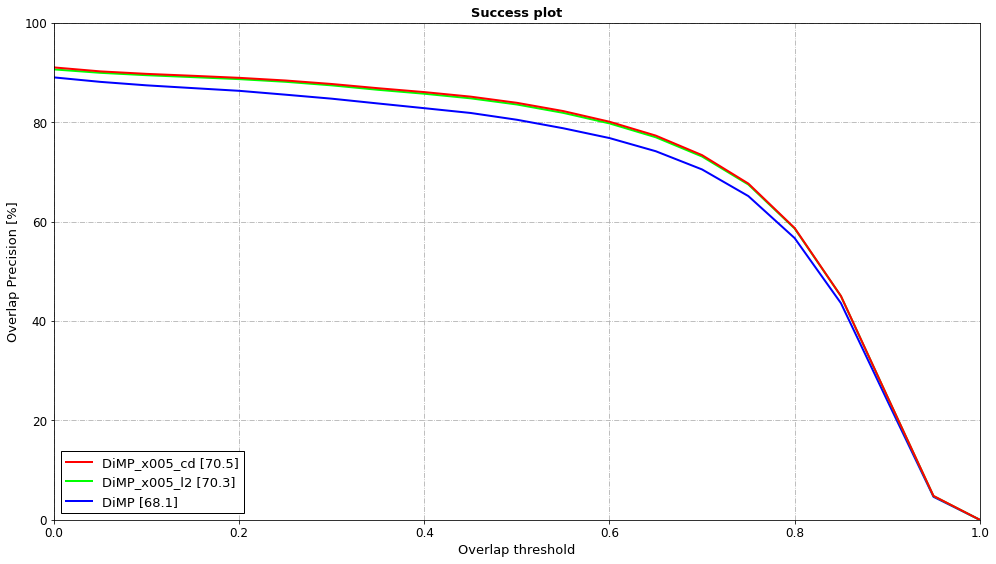

In [13]:
trackers = []
#trackers.extend(trackerlist('mh_dimp_summary', 'super_dimp_15', range(0,1), 'MH'))
trackers.extend(trackerlist('dimp_original', 'super_dimp', range(0,5), 'DiMP'))
#trackers.extend(trackerlist('mh_dimp_summary', 'super_dimp_online_x_mean_cd',range(0,5), 'DiMP_xm_cd'))
#trackers.extend(trackerlist('mh_dimp_summary', 'super_dimp_online_x_mean_l2', range(0,5), 'DiMP_xm_l2'))
trackers.extend(trackerlist('mh_dimp_summary', 'super_dimp_online_x_gamma_005_cd', range(0,5), 'DiMP_x005_cd'))
trackers.extend(trackerlist('mh_dimp_summary', 'super_dimp_online_x_gamma_005_l2', range(0,5), 'DiMP_x005_l2'))

dataset = get_dataset('lasot')
plot_results(trackers, dataset, 'OTB', merge_results=True, plot_types=('success'), 
             skip_missing_seq=True, force_evaluation=True, plot_bin_gap=0.05)

100%|███████████████████████████████████████████| 21/21 [00:04<00:00,  4.24it/s]




Computed results over 18 / 21 sequences

Plotting results over 18 / 21 sequences

Generating plots for: Fish


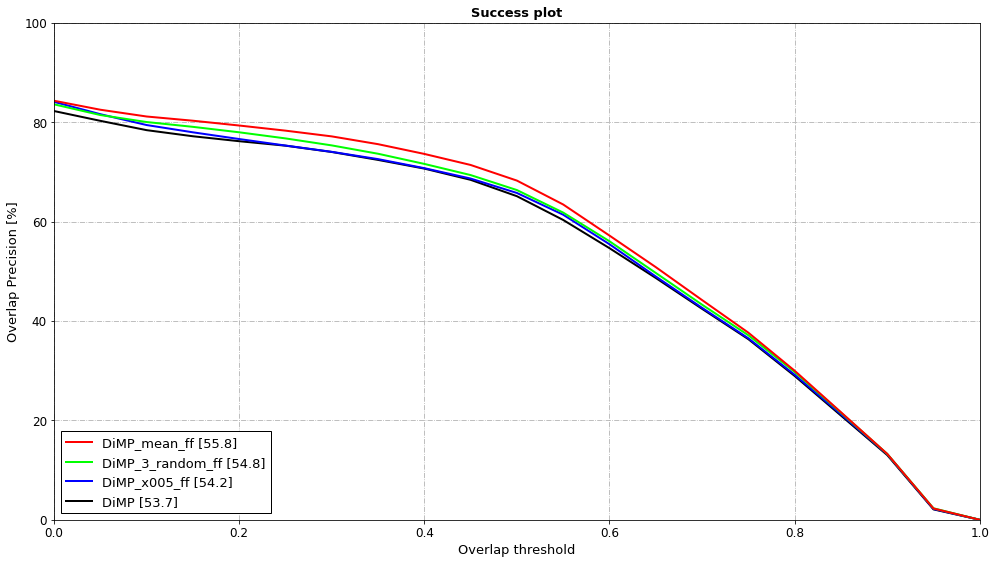

In [12]:
trackers = []
#trackers.extend(trackerlist('mh_dimp_summary', 'super_dimp_15', range(0,1), 'MH'))
trackers.extend(trackerlist('dimp_original', 'super_dimp', range(0,5), 'DiMP'))
#trackers.extend(trackerlist('mh_dimp_summary', 'super_dimp_online_x_mean_cd',range(0,5), 'DiMP_mean'))
#trackers.extend(trackerlist('mh_dimp_summary', 'super_dimp_online_x_gamma_005_cd', range(0,5), 'DiMP_x005'))
trackers.extend(trackerlist('mh_dimp_summary', 'super_dimp_online_random_3_fill_first', range(0,5), 'DiMP_3_random_ff'))
trackers.extend(trackerlist('mh_dimp_summary', 'super_dimp_online_x_gamma_005_cd_fill_first', range(0,5), 'DiMP_x005_ff'))
trackers.extend(trackerlist('mh_dimp_summary', 'super_dimp_online_x_mean_cd_fill_first', range(0,5), 'DiMP_mean_ff'))

dataset = get_dataset('fish')
plot_results(trackers, dataset, 'Fish', merge_results=True, plot_types=('success'), 
             skip_missing_seq=True, force_evaluation=True, plot_bin_gap=0.05)

## Tables for OTB, NFS, UAV and LaSOT

In [ ]:
trackers = []
trackers.extend(trackerlist('atom', 'default', range(0,5), 'ATOM'))
trackers.extend(trackerlist('dimp', 'dimp18', range(0,5), 'DiMP18'))
trackers.extend(trackerlist('dimp', 'dimp50', range(0,5), 'DiMP50'))
trackers.extend(trackerlist('dimp', 'prdimp18', range(0,5), 'PrDiMP18'))
trackers.extend(trackerlist('dimp', 'prdimp50', range(0,5), 'PrDiMP50'))

dataset = get_dataset('otb')
print_results(trackers, dataset, 'OTB', merge_results=True, plot_types=('success', 'prec', 'norm_prec'))

dataset = get_dataset('nfs')
print_results(trackers, dataset, 'NFS', merge_results=True, plot_types=('success', 'prec', 'norm_prec'))

dataset = get_dataset('uav')
print_results(trackers, dataset, 'UAV', merge_results=True, plot_types=('success', 'prec', 'norm_prec'))

dataset = get_dataset('otb', 'nfs', 'uav')
print_results(trackers, dataset, 'OTB+NFS+UAV', merge_results=True, plot_types=('success', 'prec', 'norm_prec'))

dataset = get_dataset('lasot')
print_results(trackers, dataset, 'LaSOT', merge_results=True, plot_types=('success', 'prec', 'norm_prec'))

## Filtered per-sequence results

In [ ]:
# Print per sequence results for sequences where all trackers fail, i.e. all trackers have average overlap in percentage of less than 10.0
filter_criteria = {'mode': 'ao_max', 'threshold': 10.0}
dataset = get_dataset('otb', 'nfs', 'uav')
print_per_sequence_results(trackers, dataset, 'OTB+NFS+UAV', merge_results=True, filter_criteria=filter_criteria, force_evaluation=False)

In [ ]:
# Print per sequence results for sequences where at least one tracker fails, i.e. a tracker has average overlap in percentage of less than 10.0
filter_criteria = {'mode': 'ao_min', 'threshold': 10.0}
dataset = get_dataset('otb', 'nfs', 'uav')
print_per_sequence_results(trackers, dataset, 'OTB+NFS+UAV', merge_results=True, filter_criteria=filter_criteria, force_evaluation=False)

In [ ]:
# Print per sequence results for sequences where the trackers have differing behavior.
# i.e. average overlap in percentage for different trackers on a sequence differ by at least 40.0
filter_criteria = {'mode': 'delta_ao', 'threshold': 40.0}
dataset = get_dataset('otb', 'nfs', 'uav')
print_per_sequence_results(trackers, dataset, 'OTB+NFS+UAV', merge_results=True, filter_criteria=filter_criteria, force_evaluation=False)

In [ ]:
# Print per sequence results for all sequences
filter_criteria = None
dataset = get_dataset('otb', 'nfs', 'uav')
print_per_sequence_results(trackers, dataset, 'OTB+NFS+UAV', merge_results=True, filter_criteria=filter_criteria, force_evaluation=False)